In [1]:
#import matplotlib.pyplot as plt
import numpy as np
from brian2 import *

In [2]:
start_scope()


tfinal = 400 * ms
defaultclock.dt = 0.1 * ms

eqs = """dv/dt = (0.04*v**2 + 5*v + 140 - u + I + Igap +(Isyn_gly_d-Isyn_gly_r) + (Isyn_glut_d-Isyn_glut_r))/(ms) : 1
         du/dt = (a*(b*v - u))/(ms)  : 1
         dIsyn_gly_r/dt = -Isyn_gly_r/(0.5*ms) : 1 
         dIsyn_gly_d/dt  = -Isyn_gly_d/(3*ms) : 1
         dIsyn_glut_r/dt = -Isyn_glut_r/(0.25*ms): 1
         dIsyn_glut_d/dt  = -Isyn_glut_d/(1*ms) : 1
         I : 1
         a : 1
         b : 1
         c : 1
         d : 1
         x : metre
         y : metre
         Igap : 1 # gap junction current
       """

In [3]:
##### define populations
PM = NeuronGroup(5, eqs, threshold="v>=-10", reset="v=c; u+=d", method='euler')
PM.a = 0.02
PM.b = 0.25
PM.c = -50
PM.d = 2.0
PM.u = "b*v" 
PM.x = 1.0*umetre
PM.y = "0.8*umetre+0.1*umetre*i"
PM.v = -65
PM.I = 7

MN = NeuronGroup(15, eqs, threshold="v>=0", reset="v=c; u+=d", method='euler')
MN.a = 0.1
MN.b = 0.25
MN.c = -53
MN.d = 6.0
MN.u = "b*v"
MN.x = "5.0*umetre+1.6*i*umetre"
MN.y = 1*umetre
MN.v = -70

V2a = NeuronGroup(12, eqs, threshold="v>=0", reset="v=c; u+=d", method='euler')
V2a.a = 0.1
V2a.b = 0.25
V2a.c = -53
V2a.d = 6.0
V2a.u = "b*v"
V2a.x = "5.1*umetre+1.6*i*umetre"
V2a.y = 1.2*umetre
V2a.v = -64

V1 = NeuronGroup(10, eqs, threshold="v>=0", reset="v=c; u+=d", method='euler')
V1.a = 0.2
V1.b = 0.25
V1.c = -53
V1.d = 6.0
V1.u = "b*v"
V1.x = "8.1*umetre+1.6*i*umetre"
V1.y = 0.8*umetre
V1.v = -64


In [4]:
PM_PM_weights = array([[0.    , 0.0001, 0.0001, 0.0001, 0.0001],
       [0.0001, 0.    , 0.0001, 0.0001, 0.0001],
       [0.0001, 0.0001, 0.    , 0.0001, 0.0001],
       [0.0001, 0.0001, 0.0001, 0.    , 0.0001],
       [0.0001, 0.0001, 0.0001, 0.0001, 0.    ]])

PM_PM_weights

array([[0.    , 0.0001, 0.0001, 0.0001, 0.0001],
       [0.0001, 0.    , 0.0001, 0.0001, 0.0001],
       [0.0001, 0.0001, 0.    , 0.0001, 0.0001],
       [0.0001, 0.0001, 0.0001, 0.    , 0.0001],
       [0.0001, 0.0001, 0.0001, 0.0001, 0.    ]])

In [5]:
#specify synapses
PM_PM_syn = Synapses(PM, PM, '''
             w : 1 # gap junction conductance
             Igap_post = w * (v_pre - v_post) : 1 (summed)''')

PM_PM_syn.connect()
PM_PM_syn.w[:] = PM_PM_weights.flatten()*10

In [6]:
PM_V2a_weights = array([[0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ]])

PM_V2a_weights

array([[0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ],
       [0.008, 0.008, 0.008, 0.008, 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   , 0.   , 0.   ]])

In [7]:
PM_V2a_syn = Synapses(PM, V2a, '''
             w : 1 # gap junction conductance
             Igap_post = w * (v_pre - v_post) : 1 (summed)''')

PM_V2a_syn.connect()
PM_V2a_syn.w[:] = PM_V2a_weights.flatten()

In [8]:
V2a_V2a_weights = array([[0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])
V2a_V2a_weights

array([[0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [9]:
V2a_V2a_syn = Synapses(V2a, V2a, model='w: 1', on_pre ='''
                          Isyn_glut_r_post+=w*(E_rev_glu-v_post)
                          Isyn_glut_d_post+=w*(E_rev_glu-v_post)
                          ''')
V2a_V2a_syn.connect()
E_rev_glu = 0
# delays = np.zeros((12, 12))*32*ms*V2a.i
# V2a_V2a_syn.delay = delays.flatten()

V2a_V2a_syn.w[:] = V2a_V2a_weights.flatten()*0.2

In [10]:
V2a_MN_weights = array([[0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. ],
       [0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. ],
       [0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. ,
        0. , 0. ],
       [0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. ,
        0. , 0. ],
       [0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. ,
        0. , 0. ],
       [0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ,
        0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1,
        0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1,
        0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1,
        0.1, 0.1]])
V2a_MN_weights

array([[0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. ],
       [0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. ],
       [0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. , 0. ,
        0. , 0. ],
       [0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. , 0. ,
        0. , 0. ],
       [0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. , 0. ,
        0. , 0. ],
       [0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0. ,
        0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,
        0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1, 0.1,
        0.1, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1, 0.1,
        0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1, 0.1,
        0.1, 0.1],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.1,
       

In [11]:
V2a_MN_syn = Synapses(V2a, MN, model='w: 1', on_pre ='''
                          Isyn_glut_r_post+=w*(E_rev_glu-v_post)
                          Isyn_glut_d_post+=w*(E_rev_glu-v_post)
                          ''')
V2a_MN_syn.connect()
E_rev_glu = 0

V2a_MN_syn.w[:] = V2a_MN_weights.flatten()

In [12]:
V2a_V1_weights = array([[0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])
V2a_V1_weights

array([[0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. ],
       [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [13]:
V2a_V1_syn = Synapses(V2a, V1, model='w: 1', on_pre ='''
                          Isyn_glut_r_post+=w*(E_rev_glu-v_post)
                          Isyn_glut_d_post+=w*(E_rev_glu-v_post)
                          ''')
V2a_V1_syn.connect()
E_rev_glu = 0

V2a_V1_syn.w[:] = V2a_V1_weights.flatten()*0.6

In [14]:
#local
V1_V2a_weights = array([[0.46971935, 0.36853537, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.32863551, 0.34230645, 0.39576847, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.41396531, 0.25677661, 0.30856181, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.5098263 , 0.44729602, 0.39278015,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33707399, 0.25828071,
        0.40075918, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.31660214,
        0.32220371, 0.33242473, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.42752388, 0.40353373, 0.46338454, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14444318, 0.40087307, 0.53157354, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.45711753, 0.26945125, 0.24018923,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.34983659, 0.28622959,
        0.32432808, 0.        ]])
V1_V2a_weights

array([[0.46971935, 0.36853537, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.32863551, 0.34230645, 0.39576847, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.41396531, 0.25677661, 0.30856181, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.5098263 , 0.44729602, 0.39278015,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33707399, 0.25828071,
        0.40075918, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.31660214,
        0.32220371, 0.33242473, 0.        , 0.        , 0.        ,
        0.        ,

In [15]:
V1_V2a_syn = Synapses(V1, V2a, model='w: 1', on_pre ='''
                          Isyn_gly_r_post-=w*(E_rev_gly-v_post)
                          Isyn_gly_d_post-=w*(E_rev_gly-v_post)
                          ''')
V1_V2a_syn.connect()
E_rev_gly = -70

V1_V2a_syn.w[:] = V1_V2a_weights.flatten()

In [16]:
#distal
V1_MN_weights = array([[0., 0.,0.27560865, 0.38778881, 0., 0., 0.,0., 0., 0. , 0., 0. ,0., 0., 0.],
       [0., 0.,0.49782018, 0.26279227, 0.40070279, 0., 0.,0., 0., 0., 0., 0.,0., 0., 0.],
       [0., 0.,0., 0.33591452, 0.38523928, 0.40980613, 0.,0., 0., 0., 0., 0.,0., 0., 0.],
       [0., 0.,0., 0., 0.28264854, 0.30685701, 0.28708064,0., 0., 0., 0., 0.,0., 0., 0.],
       [0., 0.,0., 0., 0., 0.44130568, 0.35466443,0.33031238, 0., 0., 0., 0.,0., 0., 0.],
       [0., 0.,0., 0., 0., 0., 0.41440859,0.30944603, 0.43234338, 0., 0., 0.,0., 0., 0.],
       [0., 0.,0., 0., 0., 0., 0.,0.41434644, 0.25174353, 0.17092519, 0., 0.,0., 0., 0.],
       [0., 0.,0., 0., 0., 0., 0.,0., 0.29126842, 0.45553088, 0.52763866, 0.,0., 0., 0.],
       [0., 0.,0., 0., 0., 0., 0.,0., 0., 0.36898064, 0.43980351, 0.28914373,0., 0., 0.],
       [0., 0.,0., 0., 0., 0., 0., 0., 0., 0., 0.52675602, 0.37411974,0.2750039 , 0., 0.]])
V1_MN_weights

array([[0.        , 0.        , 0.27560865, 0.38778881, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.49782018, 0.26279227, 0.40070279,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.33591452, 0.38523928,
        0.40980613, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.28264854,
        0.30685701, 0.28708064, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.44130568, 0.35466443, 0.33031238, 0.        , 0.        ,
        0.        , 0.        , 0.        , 

In [17]:
V1_MN_syn = Synapses(V1, MN, model='w: 1', on_pre ='''
                          Isyn_gly_r_post-=w*(E_rev_gly-v_post)
                          Isyn_gly_d_post-=w*(E_rev_gly-v_post)
                          ''')
V1_MN_syn.connect()
E_rev_gly = -70

V1_MN_syn.w[:] = V1_MN_weights.flatten()*0.1

In [18]:
V1_PM_weights = array([[0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5]])
V1_PM_weights

array([[0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5]])

In [20]:
V1_PM_syn = Synapses(V1, PM, model='w: 1', on_pre ='''
                          Isyn_gly_r_post-=w*(E_rev_gly-v_post)
                          Isyn_gly_d_post-=w*(E_rev_gly-v_post)
                          ''')
V1_PM_syn.connect()
E_rev_gly = -70

V1_PM_syn.w[:] = V1_PM_weights.flatten()*0.01

In [21]:
xticks = []
for i in range(15):
    xticks.append(round(5.0+1.6*i,2))

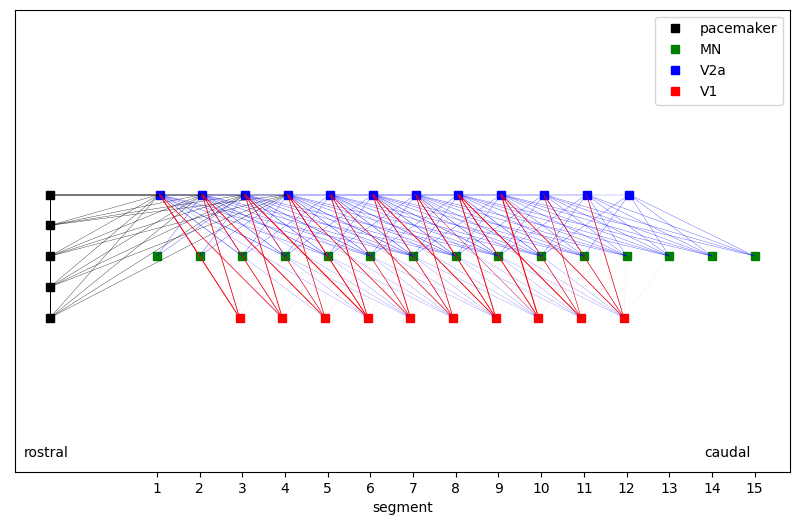

In [22]:
plt.figure(figsize=(10,6))
plt.plot(PM.x/um, PM.y/um, 'ks', label="pacemaker")
plt.plot(MN.x/um, MN.y/um, 'gs', label="MN")
plt.plot(V2a.x/um, V2a.y/um, 'bs', label="V2a")
plt.plot(V1.x/um, V1.y/um, 'rs', label="V1")
plt.ylim(0.3,1.8)
plt.xticks(ticks=xticks, labels=range(1,16))
plt.xlabel("segment")
plt.ylabel("")
plt.yticks(ticks=[])
plt.text(0,0.35,r"rostral",fontsize = 10)
plt.text(25.5,0.35,r"caudal",fontsize = 10)
plt.legend()

for i,j in zip(PM_PM_syn.i, PM_PM_syn.j):
    plt.plot([float(str(PM.x[i]).split(" ")[0]), float(str(PM.x[j]).split(" ")[0])],
             [float(str(PM.y[i]).split(" ")[0]), float(str(PM.y[j]).split(" ")[0])],
             '-k', linewidth=PM_PM_syn.w[i,j]*700);

for i,j in zip(PM_V2a_syn.i, PM_V2a_syn.j):
    plt.plot([float(str(PM.x[i]).split(" ")[0]), float(str(V2a.x[j]).split(" ")[0])],
             [float(str(PM.y[i]).split(" ")[0]), float(str(V2a.y[j]).split(" ")[0])],
             '-k', linewidth=PM_V2a_syn.w[i,j]*30);
    
for i,j in zip(V2a_V2a_syn.i, V2a_V2a_syn.j):
    plt.plot([float(str(V2a.x[i]).split(" ")[0]), float(str(V2a.x[j]).split(" ")[0])],
             [float(str(V2a.y[i]).split(" ")[0]), float(str(V2a.y[j]).split(" ")[0])],
             '-b', linewidth=V2a_V2a_syn.w[i,j]);
    
for i,j in zip(V2a_MN_syn.i, V2a_MN_syn.j):
    plt.plot([float(str(V2a.x[i]).split(" ")[0]), float(str(MN.x[j]).split(" ")[0])],
             [float(str(V2a.y[i]).split(" ")[0]), float(str(MN.y[j]).split(" ")[0])],
             '-b', linewidth=V2a_MN_syn.w[i,j]*2);
    
for i,j in zip(V2a_V1_syn.i, V2a_V1_syn.j):
    plt.plot([float(str(V2a.x[i]).split(" ")[0]), float(str(V1.x[j]).split(" ")[0])],
             [float(str(V2a.y[i]).split(" ")[0]), float(str(V1.y[j]).split(" ")[0])],
             '-b', linewidth=V2a_V1_syn.w[i,j]);
    
for i,j in zip(V1_V2a_syn.i, V1_V2a_syn.j):
    plt.plot([float(str(V1.x[i]).split(" ")[0]), float(str(V2a.x[j]).split(" ")[0])],
             [float(str(V1.y[i]).split(" ")[0]), float(str(V2a.y[j]).split(" ")[0])],
             '-r', linewidth=V1_V2a_syn.w[i,j]*1.5);
    
for i,j in zip(V1_MN_syn.i, V1_MN_syn.j):
    plt.plot([float(str(V1.x[i]).split(" ")[0]), float(str(MN.x[j]).split(" ")[0])],
             [float(str(V1.y[i]).split(" ")[0]), float(str(MN.y[j]).split(" ")[0])],
             '-r', linewidth=V1_MN_syn.w[i,j]);
    
# for i,j in zip(V1_PM_syn.i, V1_PM_syn.j):
#     plt.plot([float(str(V1.x[i]).split(" ")[0]), float(str(PM.x[j]).split(" ")[0])],
#              [float(str(V1.y[i]).split(" ")[0]), float(str(PM.y[j]).split(" ")[0])],
#              '-r', linewidth=V1_PM_syn.w[i,j]/2);
    
plt.show()

In [23]:
M_PM = StateMonitor(PM, ['v'], record=False)
sp_PM = SpikeMonitor(PM)

M_MN = StateMonitor(MN, ['v'], record=False)
sp_MN = SpikeMonitor(MN)

M_V2a = StateMonitor(V2a, ['v'], record=False)
sp_V2a = SpikeMonitor(V2a)

M_V1 = StateMonitor(V1, ['v'], record=False)
sp_V1 = SpikeMonitor(V1)



In [24]:
run(450*ms)

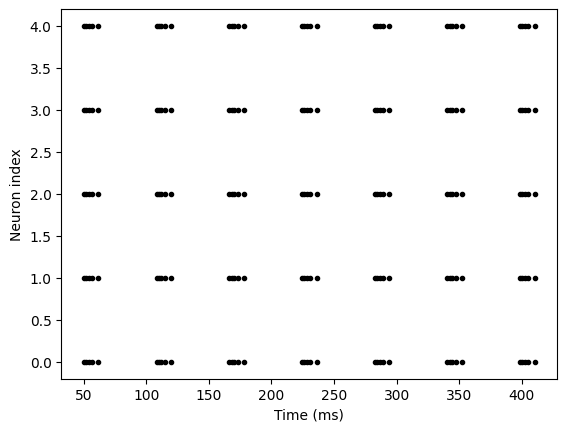

In [25]:
plot(sp_PM.t/ms, sp_PM.i, ".k")
xlabel('Time (ms)')
ylabel('Neuron index');

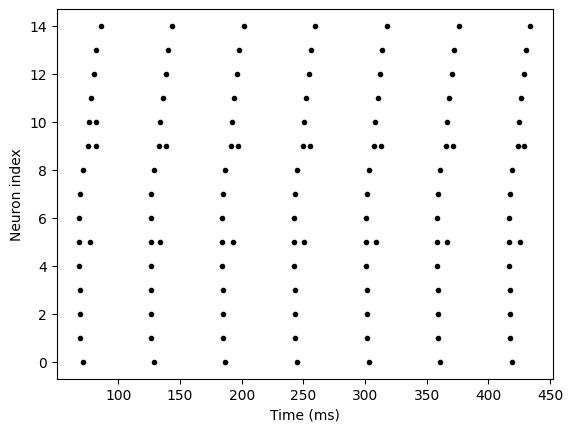

In [26]:
plot(sp_MN.t/ms, sp_MN.i, ".k")
xlabel('Time (ms)')
ylabel('Neuron index');

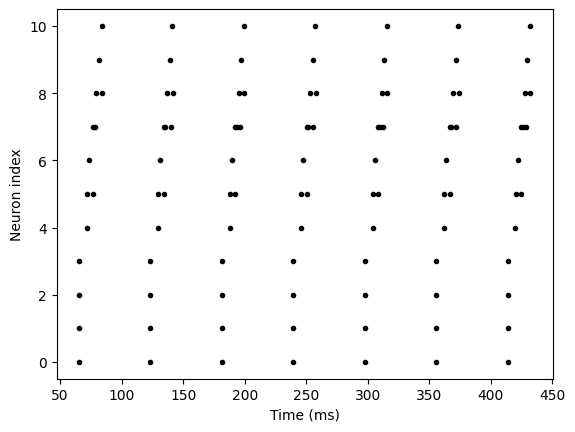

In [27]:
plot(sp_V2a.t/ms, sp_V2a.i, ".k")
xlabel('Time (ms)')
ylabel('Neuron index');

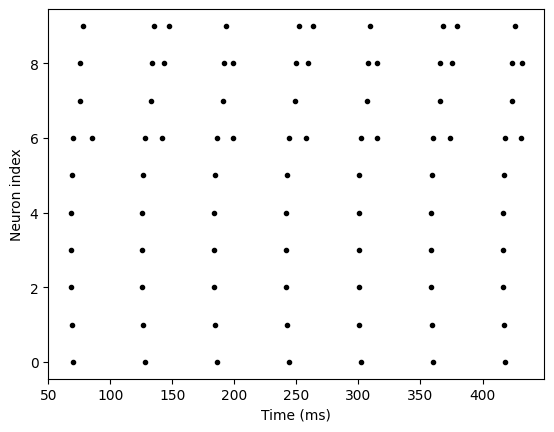

In [28]:
plot(sp_V1.t/ms, sp_V1.i, ".k")
xlabel('Time (ms)')
ylabel('Neuron index');

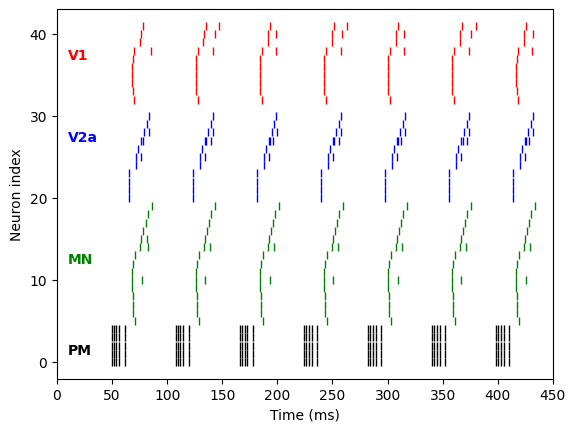

In [29]:
plot(sp_PM.t/ms, sp_PM.i, "|k")
plot(sp_MN.t/ms, sp_MN.i+5, "|g")
plot(sp_V2a.t/ms, sp_V2a.i+20, "|b")
plot(sp_V1.t/ms, sp_V1.i+32, "|r")
xlabel('Time (ms)')
xlim(0,450)
text(10,37,r"V1",fontsize = 10, color = 'r',fontweight = 'bold')
text(10,27,r"V2a",fontsize = 10, color = 'b',fontweight = 'bold')
text(10,12,r"MN",fontsize = 10, color = 'g',fontweight = 'bold')
text(10,1,r"PM",fontsize = 10, color = 'k',fontweight = 'bold')
ylabel('Neuron index');